In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from stable_baselines3 import A2C

import gpytorch

from custom_env import *
from model import *
from data_util import *

In [49]:
initial_port_value = 1000
borrowing = True
long_only = False

In [50]:
train_data = pd.read_csv('../data/spy_train.csv')
train_data['Date'] = pd.to_datetime(train_data['Date'])
val_data = pd.read_csv('../data/spy_validation.csv')
val_data['Date'] = pd.to_datetime(val_data['Date'])

env = SingleStockTradingEnv('../data/spy_train.csv', 
                            engineer_features,
                            initial_value=initial_port_value, 
                            borrowing=borrowing,
                            long_only=long_only)

Goal reached! reward= -0.3099979999997231
2318.170337999997
3.318170337999997 2.1795795056584737


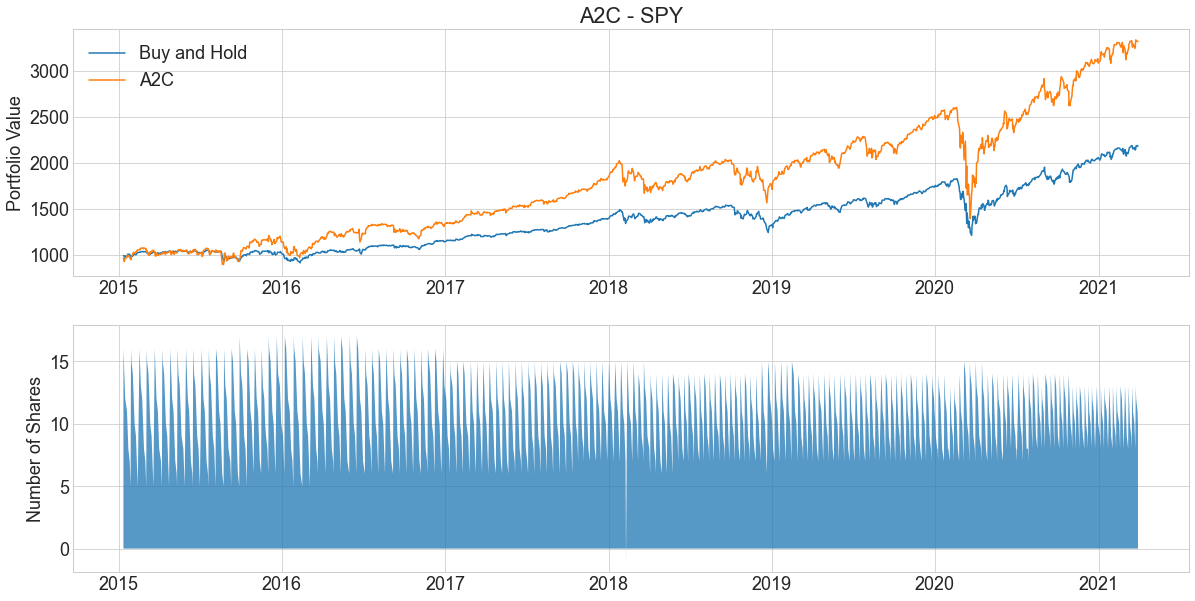

In [68]:
a2c_agent = A2C('MlpPolicy', env, gamma=0.1)
env.reset()
a2c_agent.learn(env.data.shape[0])
rl_portfolio_values, rl_agent_holdings, rl_agent_actions, rl_goal_num_shares, rl_fig = evaluate(a2c_agent, 
                                                                                                'SPY',
                                                                                                val_data, 
                                                                                                initial_port_value, 
                                                                                                borrowing, 
                                                                                                long_only, 
                                                                                                use_gp=False, 
                                                                                                plot=True, 
                                                                                                save_plots=False, 
                                                                                                env_type='no borrowing')

In [69]:
# a2c_agent.save('checkpoints/spy_no_borrowing')